<a href="https://colab.research.google.com/github/paridhika/Auto_theft_Yolo_project/blob/main/Auto_theft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

def unzip_in_current_directory(directory):
    """
    Unzips all .zip files in the specified directory (non-recursively).

    Parameters:
        directory (str): The directory to search for .zip files.
    """
    if not os.path.exists(directory):
        print(f"Directory does not exist: {directory}")
        return

    print(f"Scanning directory: {directory}")

    # List all files in the directory
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)

        # Check if the file is a .zip file
        if os.path.isfile(file_path) and file.endswith(".zip"):
            extract_dir = os.path.splitext(file_path)[0]  # Extract to a folder with the same name as the .zip file

            # Ensure the extraction directory exists
            os.makedirs(extract_dir, exist_ok=True)

            # Extract the .zip file
            try:
                with zipfile.ZipFile(file_path, 'r') as zip_ref:
                    zip_ref.extractall(extract_dir)
                    print(f"Extracted: {file_path} to {extract_dir}")
            except zipfile.BadZipFile:
                print(f"Bad zip file: {file_path}")

# Specify the path to the directory
current_directory = "/content"

# Call the function to unzip
unzip_in_current_directory(current_directory)






Scanning directory: /content
Extracted: /content/car_theft_detection_bing.v2i.yolov8.zip to /content/car_theft_detection_bing.v2i.yolov8


In [2]:
!pip install ultralytics[export]

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.4 MB/s eta

In [3]:
!pip install torch_xla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 10.0 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

import warnings
warnings.filterwarnings("ignore", message="Video stream unresponsive")

# Load a pretrained YOLO model
model = YOLO("yolo11n.pt")

# Train the model
model.train(data="/content/car_theft_detection_bing.v2i.yolov8/data.yaml", epochs=100, imgsz=640, batch=5, device="cuda")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 118MB/s]


Ultralytics 8.3.60 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/car_theft_detection_bing.v2i.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=5, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 22.4MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/car_theft_detection_bing.v2i.yolov8/train/labels... 312 images, 12 backgrounds, 0 corrupt: 100%|██████████| 312/312 [00:00<00:00, 904.74it/s]

train: New cache created: /content/car_theft_detection_bing.v2i.yolov8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/car_theft_detection_bing.v2i.yolov8/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 302.48it/s]

val: New cache created: /content/car_theft_detection_bing.v2i.yolov8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005078125), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      0.87G      2.093      4.006      2.289          5        640: 100%|██████████| 63/63 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]

                   all         30         30    0.00195       0.87     0.0338    0.00873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      0.83G      1.997      3.817      2.198          4        640: 100%|██████████| 63/63 [00:08<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.48it/s]

                   all         30         30      0.414       0.07      0.398     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.835G      2.073      3.648      2.249          2        640: 100%|██████████| 63/63 [00:11<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.52it/s]

                   all         30         30      0.396      0.128      0.111     0.0238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      0.83G      2.023      3.509      2.281          3        640: 100%|██████████| 63/63 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]

                   all         30         30      0.422     0.0435     0.0428     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      0.83G      2.109      3.476      2.374          4        640: 100%|██████████| 63/63 [00:08<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.80it/s]

                   all         30         30      0.748     0.0435     0.0311     0.0101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      0.83G      2.017      3.394      2.294          3        640: 100%|██████████| 63/63 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.55it/s]

                   all         30         30     0.0583      0.198     0.0579     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      0.83G      2.049      3.386      2.307          6        640: 100%|██████████| 63/63 [00:10<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]


                   all         30         30    0.00263       0.93     0.0185     0.0047

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      0.83G      2.005      3.322      2.283          5        640: 100%|██████████| 63/63 [00:08<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.99it/s]

                   all         30         30     0.0264     0.0435     0.0274    0.00492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      0.83G      1.967      3.245      2.246          2        640: 100%|██████████| 63/63 [00:10<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.28it/s]

                   all         30         30      0.767     0.0556      0.103     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      0.83G       1.94      3.198      2.203          6        640: 100%|██████████| 63/63 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.39it/s]

                   all         30         30      0.202      0.157       0.13     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      0.83G      1.942      3.079      2.174          6        640: 100%|██████████| 63/63 [00:08<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.64it/s]

                   all         30         30     0.0784      0.128      0.115     0.0231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      0.83G      1.941      3.012      2.209          4        640: 100%|██████████| 63/63 [00:10<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.84it/s]

                   all         30         30      0.568      0.362      0.185     0.0459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      0.83G      1.844      3.004      2.131          2        640: 100%|██████████| 63/63 [00:10<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.86it/s]

                   all         30         30     0.0963      0.126     0.0732     0.0193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      0.83G      1.912      3.007      2.185          2        640: 100%|██████████| 63/63 [00:08<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]

                   all         30         30      0.813     0.0556     0.0709     0.0256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      0.83G      1.838      2.894      2.137          8        640: 100%|██████████| 63/63 [00:10<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.85it/s]

                   all         30         30      0.311       0.19      0.216     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      0.83G      1.884      2.809      2.112          5        640: 100%|██████████| 63/63 [00:12<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.10it/s]

                   all         30         30      0.538      0.099      0.125     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      0.83G       1.79      2.773      2.058          5        640: 100%|██████████| 63/63 [00:10<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]

                   all         30         30      0.134      0.155      0.136     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      0.83G      1.796      2.728      2.073          2        640: 100%|██████████| 63/63 [00:09<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.50it/s]

                   all         30         30      0.121      0.213       0.15     0.0362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      0.83G      1.754      2.597      2.016          6        640: 100%|██████████| 63/63 [00:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.14it/s]

                   all         30         30      0.193      0.256      0.151     0.0661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      0.83G      1.788      2.517      2.026          1        640: 100%|██████████| 63/63 [00:09<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         30         30       0.18      0.254      0.144      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      0.83G      1.705      2.585       1.99          3        640: 100%|██████████| 63/63 [00:08<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.95it/s]

                   all         30         30      0.223      0.295      0.237     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      0.83G      1.675      2.559      1.995          4        640: 100%|██████████| 63/63 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.15it/s]

                   all         30         30      0.197      0.198      0.226     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      0.83G      1.684      2.434      1.988          2        640: 100%|██████████| 63/63 [00:09<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]

                   all         30         30      0.665      0.155      0.225     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      0.83G      1.706      2.468      2.006          7        640: 100%|██████████| 63/63 [00:09<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.82it/s]

                   all         30         30      0.221      0.239      0.213     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      0.83G      1.677      2.408       1.98          4        640: 100%|██████████| 63/63 [00:11<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.97it/s]

                   all         30         30      0.215       0.21       0.26     0.0828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      0.83G       1.63      2.366       1.93          5        640: 100%|██████████| 63/63 [00:09<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]

                   all         30         30      0.225      0.324      0.246     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      0.83G      1.697      2.293      1.975          3        640: 100%|██████████| 63/63 [00:09<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.46it/s]

                   all         30         30      0.793      0.307      0.351       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.828G      1.579      2.228      1.863          3        640: 100%|██████████| 63/63 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.02it/s]

                   all         30         30          1      0.178      0.327      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      0.83G      1.653      2.273      1.907          6        640: 100%|██████████| 63/63 [00:09<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]

                   all         30         30      0.657      0.151      0.232     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      0.83G      1.564      2.118      1.842          4        640: 100%|██████████| 63/63 [00:09<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.86it/s]

                   all         30         30      0.423      0.268      0.285      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      0.83G      1.555      2.123      1.836          5        640: 100%|██████████| 63/63 [00:10<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.58it/s]

                   all         30         30      0.566      0.195      0.209     0.0727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.828G      1.531      2.115      1.843          8        640: 100%|██████████| 63/63 [00:10<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.04it/s]

                   all         30         30       0.35      0.239       0.25     0.0905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      0.83G      1.534      2.084      1.844          4        640: 100%|██████████| 63/63 [00:08<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.11it/s]

                   all         30         30      0.576      0.309       0.29      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      0.83G      1.575      2.088      1.854          3        640: 100%|██████████| 63/63 [00:10<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.36it/s]

                   all         30         30      0.653      0.338      0.317      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      0.83G      1.473      1.983      1.764          5        640: 100%|██████████| 63/63 [00:10<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]

                   all         30         30      0.258      0.382       0.28     0.0936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      0.83G      1.474      1.937      1.789          5        640: 100%|██████████| 63/63 [00:08<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.93it/s]

                   all         30         30      0.261      0.338      0.264     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      0.83G      1.428      1.893      1.728          5        640: 100%|██████████| 63/63 [00:13<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.40it/s]

                   all         30         30      0.255      0.213      0.298      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      0.83G      1.475      1.966      1.795          1        640: 100%|██████████| 63/63 [00:10<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]

                   all         30         30      0.741      0.324      0.271      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      0.83G      1.408      1.936      1.727          6        640: 100%|██████████| 63/63 [00:08<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.28it/s]

                   all         30         30      0.151      0.192      0.151     0.0523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      0.83G      1.441      1.878      1.758          8        640: 100%|██████████| 63/63 [00:10<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.54it/s]

                   all         30         30      0.233      0.227      0.248     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      0.83G      1.412      1.893      1.748          6        640: 100%|██████████| 63/63 [00:10<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]

                   all         30         30      0.322      0.356      0.327      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      0.83G      1.344      1.814      1.662          5        640: 100%|██████████| 63/63 [00:08<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.70it/s]

                   all         30         30      0.594      0.242      0.205     0.0782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      0.83G      1.288      1.729      1.614          5        640: 100%|██████████| 63/63 [00:10<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.25it/s]

                   all         30         30      0.485      0.171      0.207     0.0645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      0.83G      1.384      1.737      1.668          2        640: 100%|██████████| 63/63 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.37it/s]

                   all         30         30      0.728      0.239      0.294      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      0.83G      1.362      1.711      1.655          3        640: 100%|██████████| 63/63 [00:08<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.02it/s]

                   all         30         30      0.173      0.643      0.258     0.0973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      0.83G       1.32      1.607      1.632          5        640: 100%|██████████| 63/63 [00:10<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.88it/s]

                   all         30         30      0.276      0.353      0.296      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.828G      1.339      1.712      1.649          6        640: 100%|██████████| 63/63 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.53it/s]

                   all         30         30       0.22      0.302      0.256      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      0.83G      1.279      1.627      1.577          4        640: 100%|██████████| 63/63 [00:08<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.43it/s]

                   all         30         30       0.82      0.293      0.307      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      0.83G      1.289      1.602      1.608          6        640: 100%|██████████| 63/63 [00:11<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.89it/s]

                   all         30         30      0.822      0.282      0.386      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      0.83G       1.28      1.577       1.59          5        640: 100%|██████████| 63/63 [00:10<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.81it/s]

                   all         30         30       0.72      0.171      0.299      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      0.83G      1.299      1.561      1.593          4        640: 100%|██████████| 63/63 [00:08<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.62it/s]

                   all         30         30      0.562      0.179      0.233     0.0964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      0.83G      1.218      1.461      1.544          7        640: 100%|██████████| 63/63 [00:10<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.62it/s]

                   all         30         30      0.281      0.227      0.208     0.0921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      0.83G      1.167      1.459        1.5          3        640: 100%|██████████| 63/63 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.66it/s]

                   all         30         30      0.318      0.283      0.258     0.0936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      0.83G      1.233      1.454      1.536          4        640: 100%|██████████| 63/63 [00:08<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.35it/s]

                   all         30         30      0.235      0.284      0.225     0.0845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      0.83G      1.183      1.419      1.504          7        640: 100%|██████████| 63/63 [00:09<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.77it/s]

                   all         30         30      0.482      0.252      0.304      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      0.83G      1.153      1.366      1.503          4        640: 100%|██████████| 63/63 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.62it/s]

                   all         30         30      0.491      0.254      0.356       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.828G      1.136      1.412      1.497          2        640: 100%|██████████| 63/63 [00:08<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.49it/s]

                   all         30         30      0.445      0.299      0.328      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      0.83G      1.138      1.331       1.49          5        640: 100%|██████████| 63/63 [00:11<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.21it/s]

                   all         30         30      0.313      0.264        0.3      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.828G      1.178       1.33       1.48          3        640: 100%|██████████| 63/63 [00:10<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.15it/s]

                   all         30         30      0.466      0.225      0.283     0.0875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      0.83G      1.149      1.374      1.492          5        640: 100%|██████████| 63/63 [00:10<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]

                   all         30         30      0.588      0.227      0.312      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      0.83G        1.1      1.297      1.453          5        640: 100%|██████████| 63/63 [00:08<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.52it/s]

                   all         30         30      0.839      0.213      0.317     0.0856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      0.83G      1.099      1.224       1.44          2        640: 100%|██████████| 63/63 [00:11<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.11it/s]

                   all         30         30      0.207      0.324      0.303      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      0.83G      1.068       1.21      1.426          2        640: 100%|██████████| 63/63 [00:10<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]

                   all         30         30      0.759      0.171      0.249     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.828G      1.092      1.263      1.437          7        640: 100%|██████████| 63/63 [00:08<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.56it/s]

                   all         30         30      0.764      0.349      0.365      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      0.83G      1.094      1.272      1.441          3        640: 100%|██████████| 63/63 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.32it/s]

                   all         30         30      0.798      0.309      0.399      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      0.83G      1.082      1.232      1.435          2        640: 100%|██████████| 63/63 [00:10<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

                   all         30         30      0.413      0.715      0.439      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      0.83G      1.082      1.287      1.419          6        640: 100%|██████████| 63/63 [00:09<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]

                   all         30         30      0.381      0.312      0.329      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.828G      1.052      1.211      1.405          6        640: 100%|██████████| 63/63 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.95it/s]

                   all         30         30      0.497      0.239      0.339      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      0.83G     0.9974      1.148      1.371          3        640: 100%|██████████| 63/63 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.11it/s]

                   all         30         30      0.823      0.268      0.361       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      0.83G     0.9772      1.102      1.341          2        640: 100%|██████████| 63/63 [00:09<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.24it/s]

                   all         30         30      0.461      0.273      0.319      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      0.83G       1.03      1.171      1.383          4        640: 100%|██████████| 63/63 [00:09<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.75it/s]

                   all         30         30      0.374      0.283      0.281      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      0.83G      1.019      1.076      1.352          4        640: 100%|██████████| 63/63 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.94it/s]

                   all         30         30       0.74      0.254      0.272     0.0942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      0.83G     0.9861      1.119      1.365          3        640: 100%|██████████| 63/63 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]

                   all         30         30      0.785      0.283       0.29     0.0978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      0.83G     0.9847       1.14      1.335          2        640: 100%|██████████| 63/63 [00:08<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.82it/s]

                   all         30         30      0.843      0.293      0.305       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      0.83G     0.9977      1.089      1.357          3        640: 100%|██████████| 63/63 [00:11<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.00it/s]

                   all         30         30       0.76      0.246      0.259      0.099



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.828G     0.9587      1.054      1.333          4        640: 100%|██████████| 63/63 [00:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]

                   all         30         30      0.399      0.242       0.27      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      0.83G     0.9633      1.085      1.344          7        640: 100%|██████████| 63/63 [00:08<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.19it/s]

                   all         30         30      0.398      0.225      0.303      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      0.83G      0.973      1.109      1.359          2        640: 100%|██████████| 63/63 [00:12<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]

                   all         30         30      0.392      0.262      0.302      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.828G     0.9027     0.9962      1.287          5        640: 100%|██████████| 63/63 [00:10<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.24it/s]

                   all         30         30      0.429      0.262      0.317      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      0.83G     0.9033      1.092      1.272          0        640: 100%|██████████| 63/63 [00:09<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]

                   all         30         30      0.437      0.268      0.291      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.828G     0.9347      1.041      1.314          2        640: 100%|██████████| 63/63 [00:09<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.31it/s]

                   all         30         30      0.447      0.268      0.283      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      0.83G     0.8745     0.9701       1.26          4        640: 100%|██████████| 63/63 [00:10<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.91it/s]

                   all         30         30      0.736      0.184      0.221     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.828G     0.9214     0.9761      1.287          5        640: 100%|██████████| 63/63 [00:09<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         30         30      0.795      0.198      0.228     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      0.83G     0.9133     0.9779      1.298          6        640: 100%|██████████| 63/63 [00:08<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.56it/s]

                   all         30         30      0.863      0.198      0.233      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      0.83G     0.8216     0.9319      1.243          3        640: 100%|██████████| 63/63 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.81it/s]

                   all         30         30      0.854      0.207      0.226      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      0.83G     0.8931     0.9951      1.286          3        640: 100%|██████████| 63/63 [00:10<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all         30         30      0.719      0.213      0.209     0.0975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      0.83G     0.8837     0.9453      1.295          3        640: 100%|██████████| 63/63 [00:08<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.02it/s]

                   all         30         30      0.365      0.281      0.238      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      0.83G     0.8306     0.9522      1.264          6        640: 100%|██████████| 63/63 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.15it/s]

                   all         30         30       0.83       0.21      0.236     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      0.83G     0.8088     0.9018      1.222          3        640: 100%|██████████| 63/63 [00:09<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]

                   all         30         30      0.823       0.21       0.24      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      0.83G     0.8369     0.9251      1.233          1        640: 100%|██████████| 63/63 [00:09<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.07it/s]

                   all         30         30      0.319      0.268      0.271      0.117


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.828G     0.7819     0.8091      1.226          2        640: 100%|██████████| 63/63 [00:11<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.64it/s]

                   all         30         30      0.446      0.254       0.24      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.828G     0.7752     0.7353      1.223          2        640: 100%|██████████| 63/63 [00:10<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]

                   all         30         30      0.791      0.254      0.252      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.828G      0.707     0.7027      1.168          2        640: 100%|██████████| 63/63 [00:08<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.13it/s]

                   all         30         30      0.812      0.254      0.272      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.828G     0.7459     0.7059      1.222          2        640: 100%|██████████| 63/63 [00:10<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.45it/s]

                   all         30         30       0.78      0.262       0.29      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.828G     0.6936     0.6743       1.17          2        640: 100%|██████████| 63/63 [00:09<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.13it/s]

                   all         30         30      0.332      0.258      0.245      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.828G     0.6992     0.6542      1.168          2        640: 100%|██████████| 63/63 [00:08<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.96it/s]

                   all         30         30      0.337      0.257      0.248      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.828G     0.7079     0.6616      1.181          1        640: 100%|██████████| 63/63 [00:10<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.85it/s]

                   all         30         30       0.34      0.264      0.272      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.828G     0.6747     0.6276      1.158          2        640: 100%|██████████| 63/63 [00:10<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]

                   all         30         30      0.325      0.252      0.238      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.828G     0.6769     0.6297      1.136          2        640: 100%|██████████| 63/63 [00:10<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.07it/s]

                   all         30         30      0.764      0.253      0.263       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.828G      0.699     0.6527      1.164          2        640: 100%|██████████| 63/63 [00:10<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.84it/s]

                   all         30         30      0.767      0.254      0.253      0.124



100 epochs completed in 0.312 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.60 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]


                   all         30         30      0.409      0.716      0.443      0.188
            anti_theft          1          1      0.184          1      0.199     0.0199
             car_theft         23         23      0.216      0.348      0.307      0.104
                normal          6          6      0.827      0.801      0.824       0.44
Speed: 0.2ms preprocess, 5.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79a3c59b5c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [5]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # Replace with your trained model file

# Path to the test folder
test_folder = "/content/car_theft_detection_bing.v2i.yolov8/test/images"

# Run predictions
results = model.predict(source=test_folder, imgsz=640, device="cpu", save=True)

# The 'save=True' option saves the prediction images with bounding boxes in a folder



image 1/15 /content/car_theft_detection_bing.v2i.yolov8/test/images/Image_17_jpeg.rf.4a3545b7bd6bc6913436d538d60d5c00.jpg: 640x640 1 car_theft, 234.3ms
image 2/15 /content/car_theft_detection_bing.v2i.yolov8/test/images/Image_18_jpg.rf.2756201e27dcd6dbe14224c2c2d9e4aa.jpg: 640x640 1 car_theft, 197.6ms
image 3/15 /content/car_theft_detection_bing.v2i.yolov8/test/images/Image_20_jpg.rf.2095655d2a8aa58f9629553f7617aee9.jpg: 640x640 (no detections), 194.9ms
image 4/15 /content/car_theft_detection_bing.v2i.yolov8/test/images/Image_28_jpg.rf.74b02f7eb91d4d353adad9521fb61b86.jpg: 640x640 (no detections), 201.0ms
image 5/15 /content/car_theft_detection_bing.v2i.yolov8/test/images/Image_28_jpg.rf.ba25b34de3964a77fe502085440e708b.jpg: 640x640 (no detections), 195.2ms
image 6/15 /content/car_theft_detection_bing.v2i.yolov8/test/images/Image_4_jpg.rf.7396694782d737fb2b68c45c7a7bb349.jpg: 640x640 (no detections), 198.5ms
image 7/15 /content/car_theft_detection_bing.v2i.yolov8/test/images/Image_58_


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/car_theft_test1.jpeg: 384x640 (no detections), 213.8ms
Speed: 4.9ms preprocess, 213.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


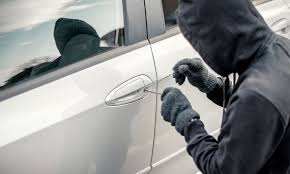

None
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


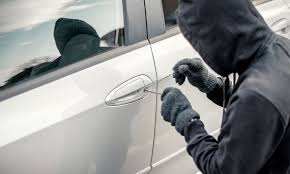

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [ ]:
# Run inference
results = model("/content/car_theft_test1.jpeg", conf=0.2)

# Process each result
for result in results:
    result.show()  # Display detection results

for result in results:
    print(result.probs)  # Prints the detections in a pandas dataframe
    result.show()  # Display the image with the detections



WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/normal_test1.jpeg: 480x640 (no detections), 258.8ms
Speed: 4.3ms preprocess, 258.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


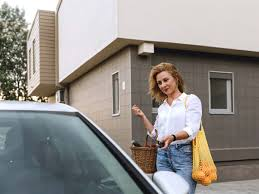

None


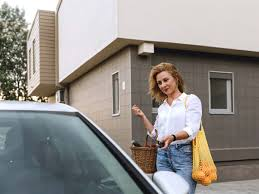

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [ ]:
# Run inference
results = model("/content/normal_test1.jpeg", conf=0.2)

# Process each result
for result in results:
    result.show()  # Display detection results

for result in results:
    print(result.probs)  # Prints the detections in a pandas dataframe
    result.show()  # Display the image with the detections
